<a href="https://colab.research.google.com/github/wogur9503/AndroidGoogleMap/blob/master/ai_sc11x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


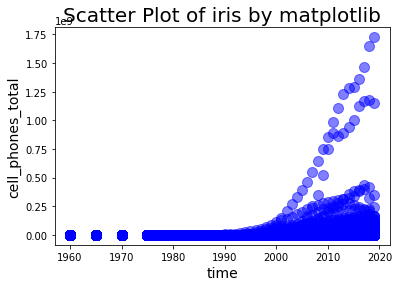

In [213]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

#불러와서 데이터 프레임화
df1 = pd.read_csv('data1.csv') # geo, time, cellphonetotal
df1 = df1.drop(df1.columns[0], axis=1)
df2 = pd.read_csv('data2.csv') # geo, time, population
df2 = df2.drop(df2.columns[0], axis=1)
df3 = pd.read_csv('data3.csv') # geo, country
df3 = df3.drop(df3.columns[0], axis=1)
#결측치 확인
df3.isnull().sum()

#scatter plot 그리기
plt.plot('time',  # x
         'cell_phones_total',  # y
         data=df1, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('time', fontsize=14)
plt.ylabel('cell_phones_total', fontsize=14)
plt.show()



### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [214]:
df4 = pd.merge(df1, df2)
df_jd = pd.merge(df4, df3)
df_jd


,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [69]:
# ppp = cell_phones_total / population
df_jd['ppp'] = df_jd['cell_phones_total'] / df_jd['population']

# country 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_korea = df_jd['geo'] == 'kor'
# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
korea = df_jd[is_korea]
# 결과를 출력합니다.
korea[-1:]

,geo,time,cell_phones_total,population,country,ppp
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [215]:
# df_dm = df_jd.melt(id_vars = 'geo', value_vars = ['매출액', '자산총계', 'EPS(원)']) # id_vars = 기준, variable = 합칠 특성 

df_dm = df_jd.drop(df_jd.columns[0:4], axis=1)
a = []    # 빈 리스트 생성
b = []

# for문이용해서 country명뽑아냄
for i in range(len(df_dm.index)-1):             
  if df_dm.loc[i, 'country'] != df_dm.loc[(i+1), 'country']:
    columnsName = df_dm.loc[i, 'country']
    a.append(columnsName)    # append로 요소 추가



# df_four = pd.DataFrame(data = a, columns = ['country'])
# df_four['ppp'] = 0
# for i in range(len(df_dm.index)-1):
#   if df_dm.loc[i, 'country'] == df_dm.loc[(i+1), 'country']:
#     df_four.loc[i, df_dm.loc[i, 'ppp']] += df_dm.loc[i, 'ppp'] 

b = pd.DataFrame(a)
b = df_jd.groupby('geo').mean()
b

,time,cell_phones_total,population
geo,,,
abw,1992.487805,3.865366e+04,7.814995e+04
afg,1995.000000,4.416223e+06,2.029233e+07
ago,1995.000000,3.246200e+06,1.579502e+07
alb,1995.000000,9.545948e+05,2.902446e+06
and,1995.000000,2.705677e+04,5.903456e+04
...,...,...,...
wsm,1992.906977,2.294947e+04,1.672190e+05
yem,1994.489362,3.403754e+06,1.539619e+07
zaf,1995.000000,2.244512e+07,4.056613e+07


가장 많은 PPP 값을 갖는 top 10 (geo) 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|geo|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()
print(df)

(27, 2)
            biden_cable_multiple  biden_online_multiple
date                                                   
2018-12-30              0.245492               0.356659
2019-01-06              0.431604               0.492401
2019-01-13              0.990476               0.360000
2019-01-20              0.423497               0.440758
2019-01-27              0.204420               0.274752
2019-02-03              0.276596               0.334471
2019-02-10              0.375824               0.335766
2019-02-17              0.305101               0.331754
2019-02-24              0.426205               0.316879
2019-03-03              0.844530               0.425787
2019-03-10              0.691954               0.652755
2019-03-17              1.006897               0.632721
2019-03-24              1.258824               0.784211
2019-03-31              4.882033               1.783109
2019-04-07              0.692771               0.477987
2019-04-14              0.501031        

아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


No handles with labels found to put in legend.


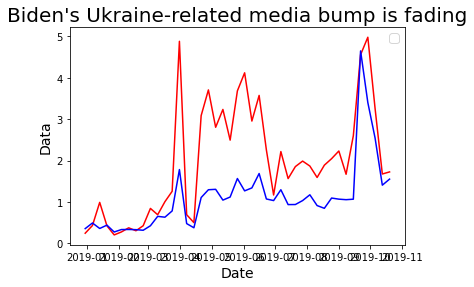

In [120]:
# Line Graph by matplotlib with wide-form DataFrame
plt.plot(df['biden_cable_multiple'], marker=None, color='r')
plt.plot(df['biden_online_multiple'], marker=None, color='b')

plt.title('Biden\'s Ukraine-related media bump is fading', fontsize=20) 
plt.ylabel('Data', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()


## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


In [170]:
df_usa = df_jd[df_jd['country'] == 'United States']
df_chn = df_jd[df_jd['country'] == 'China']
fivethirtyeight = pd.concat([df_usa, df_chn])

# # 빈 리스트 생성
# a_US = []
# a_CHN = []

# # 리스트에 cellphonetotal채우기
# for i in range(len(fivethirtyeight.index)):
#   if fivethirtyeight.iloc[i]['country'] == 'United States':
#     a_US.append(fivethirtyeight.iloc[i]['cell_phones_total'])
#   elif fivethirtyeight.iloc[i]['country'] == 'China':
#     a_CHN.append(fivethirtyeight.iloc[i]['cell_phones_total'])
# #plot생성
# plt.plot(a_US,marker=None, color='r')
# plt.plot(a_CHN, marker=None, color='b')
# plt.ylabel('cell_phones_total', fontsize=14)
# plt.xlabel('Date', fontsize=14)
# plt.show()

#geo code를 lowercase가 아닌 uppercase 로 바꿔보세요.
# fivethirtyeight.sort_values(by=['geo'], axis=0)

#미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요? A = 2014
for i in range(len(df_usa.index)):
  if df_usa.iloc[i]['cell_phones_total'] > df_usa.iloc[i]['population']:
    print(df_usa.iloc[i]['time'])

2014
2015
2016
2017
2018
